# DoS ML Model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

## Preprocessing data for binary classification (DoS (DDoS and DoS) or Benign)

In [2]:
from functions_ml import *

train_sets, test_sets = get_train_and_test_files()

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

## Scaling

In [3]:
scaler = MinMaxScaler()

for train_set in tqdm(train_sets):
    scaler.fit(read_csv_file(train_set)[X_columns])

100%|██████████| 135/135 [01:46<00:00,  1.27it/s]


## Dictionnary for spliting data

In [3]:
dict_3_classes = {}
dict_3_classes['DDoS-RSTFINFlood'] = 'DoS'
dict_3_classes['DDoS-PSHACK_Flood'] = 'DoS'
dict_3_classes['DDoS-SYN_Flood'] = 'DoS'
dict_3_classes['DDoS-UDP_Flood'] = 'DoS'
dict_3_classes['DDoS-TCP_Flood'] = 'DoS'
dict_3_classes['DDoS-ICMP_Flood'] = 'DoS'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'DoS'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'DoS'
dict_3_classes['DDoS-SlowLoris'] = 'DoS'
dict_3_classes['DDoS-HTTP_Flood'] = 'DoS'
dict_3_classes['DoS-UDP_Flood'] = 'DoS'
dict_3_classes['DoS-SYN_Flood'] = 'DoS'
dict_3_classes['DoS-TCP_Flood'] = 'DoS'
dict_3_classes['DoS-HTTP_Flood'] = 'DoS'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

In [4]:
file_path = DATASET_DIRECTORY + 'DoS\\'

In [5]:
refactor_dataframe(train_sets, dict_3_classes, scaler, file_path, X_columns, y_column)

100%|██████████| 134/134 [19:25<00:00,  8.70s/it]


In [6]:
print(get_all_datasets_and_sort(file_path))

#TODO:
# Load each datasets
# Add all count 'label'

['dataset0.csv', 'dataset1.csv', 'dataset10.csv', 'dataset11.csv', 'dataset12.csv', 'dataset13.csv', 'dataset14.csv', 'dataset15.csv', 'dataset16.csv', 'dataset17.csv', 'dataset18.csv', 'dataset19.csv', 'dataset2.csv', 'dataset20.csv', 'dataset21.csv', 'dataset22.csv', 'dataset23.csv', 'dataset24.csv', 'dataset25.csv', 'dataset26.csv', 'dataset27.csv', 'dataset28.csv', 'dataset29.csv', 'dataset3.csv', 'dataset30.csv', 'dataset31.csv', 'dataset32.csv', 'dataset33.csv', 'dataset34.csv', 'dataset35.csv', 'dataset36.csv', 'dataset37.csv', 'dataset38.csv', 'dataset39.csv', 'dataset4.csv', 'dataset40.csv', 'dataset41.csv', 'dataset42.csv', 'dataset43.csv', 'dataset44.csv', 'dataset45.csv', 'dataset46.csv', 'dataset47.csv', 'dataset48.csv', 'dataset49.csv', 'dataset5.csv', 'dataset50.csv', 'dataset51.csv', 'dataset52.csv', 'dataset53.csv', 'dataset54.csv', 'dataset55.csv', 'dataset56.csv', 'dataset57.csv', 'dataset58.csv', 'dataset59.csv', 'dataset6.csv', 'dataset60.csv', 'dataset61.csv', 'da

DoS       219789
Benign      5738
Name: label, dtype: int64


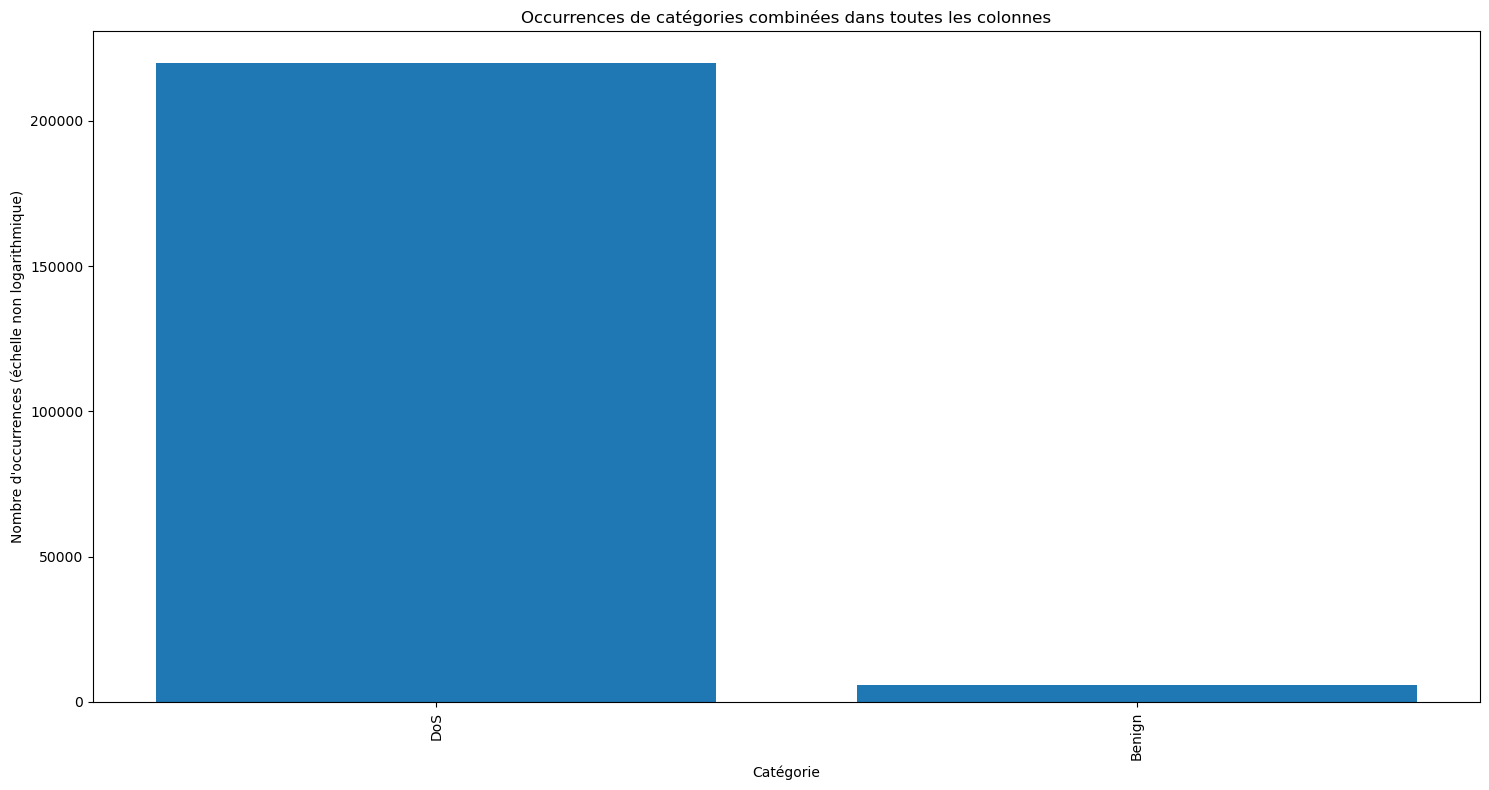

In [6]:
df = pd.read_csv(file_path + 'dataset.csv')
categorie_counts = df['label'].value_counts()
categorie_counts = categorie_counts.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
print(categorie_counts)

plt.bar(categorie_counts.index, categorie_counts.values)
log_scale = False
if log_scale:
    plt.yscale('log')  # Utilisez une échelle logarithmique sur l'axe des y
plt.xlabel('Catégorie')
if log_scale:
    plt.ylabel('Nombre d\'occurrences (échelle logarithmique)')
else:
    plt.ylabel('Nombre d\'occurrences (échelle non logarithmique)')
plt.title(f'Occurrences de catégories combinées dans toutes les colonnes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Tests

In [ ]:
# simpleModelsDef = [
#     {
#         "Name": "DT",
#         "Model": DecisionTreeClassifier(random_state = 42)
#     },
#     {
#         "Name": "RF",
#         "Model": RandomForestClassifier(random_state = 42)
#     },
#     {
#         "Name": "XGB",
#         "Model": XGBClassifier(random_state = 42)
#     },
# ]

# {
#         "Name": "Voting",
#         "Model": VotingClassifier([
#             ('XGBClassifier', joblib.load('.\\Models\\TUNING\\model_XGB.joblib')),
#             ('DecisionTreeClassifier', joblib.load('.\\Models\\TUNING\\model_DT.joblib')),
#             ('RandomForestClassifier', joblib.load('.\\Models\\TUNING\\model_RF.joblib')),
#             ],
#             voting='soft')
# }

In [8]:
import gc
gc.collect()

3721